In [1]:
import pymongo
from pymongo import MongoClient
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
import warnings
from nbi1 import *
from numpy.random import randn
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy

warnings.filterwarnings('ignore')

## Import Data

In [2]:
### Dataset without outliers
df_no_outliers = pd.read_csv("02-20-19-thesis-dataset-without-outliers", index_col=0 )

### Dataset with outlier
df = pd.read_csv("02-20-19-thesis-dataset", index_col=0 )

## Normality Test

In [8]:
def normality_test(data):
    # normality test
    result = anderson(data)
    print("Anderson - Darling Test")
    print("---"*15)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks Gaussian (fail to reject H0) ' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look Gaussian (reject H0) ' % (sl, cv))
    print("\n")
    print("D’Agostino’s K^2 Test")
    print("---"*15)
    
    
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    print("\n")
    print("Kolmogorov-Smirnov")
    print("---"*15)

    stat, p = scipy.stats.kstest(data, cdf='norm')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    # q-q plot
    qqplot(data, line='s')
    pyplot.show()
    

### Results : Data without outliers

Anderson - Darling Test
---------------------------------------------
Statistic: 2768.721
15.000: 0.576, data does not look Gaussian (reject H0) 
10.000: 0.656, data does not look Gaussian (reject H0) 
5.000: 0.787, data does not look Gaussian (reject H0) 
2.500: 0.918, data does not look Gaussian (reject H0) 
1.000: 1.092, data does not look Gaussian (reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=12917.120, p=0.000
Data does not look Gaussian (reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Statistics=0.064, p=0.000
Data does not look Gaussian (reject H0)


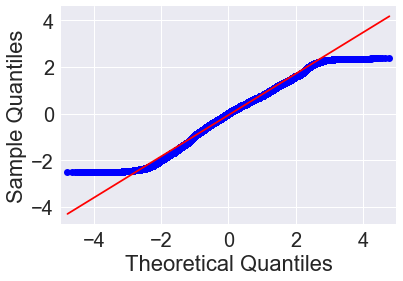

In [9]:
normality_test(df_no_outliers["Baseline Difference Score"])

### Normality Test - Random Sample N = 100

Anderson - Darling Test
---------------------------------------------
Statistic: 0.580
15.000: 0.570, data does not look Gaussian (reject H0) 
10.000: 0.650, data looks Gaussian (fail to reject H0) 
5.000: 0.779, data looks Gaussian (fail to reject H0) 
2.500: 0.909, data looks Gaussian (fail to reject H0) 
1.000: 1.081, data looks Gaussian (fail to reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=2.198, p=0.333
Data looks Gaussian (fail to reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Statistics=0.071, p=0.035
Data does not look Gaussian (reject H0)


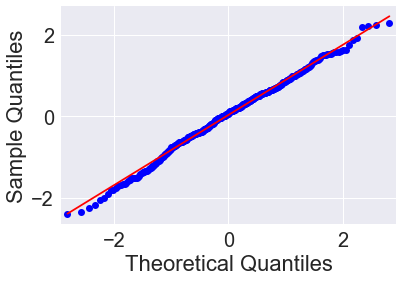

In [10]:
sample = df_no_outliers["Baseline Difference Score"].sample(n=400)
normality_test(sample)

### Results : Data with outliers

### Baseline Difference Score - Summary Statistics


In [11]:
pd.set_option('float_format', '{:f}'.format)
pd.DataFrame(df_no_outliers["Baseline Difference Score"].describe())

,Baseline Difference Score
count,1142331.000000
mean,-0.061857
std,0.887209
min,-2.502432
25%,-0.617591
50%,0.014356
75%,0.548616
max,2.368290


In [29]:
sample_desc = pd.DataFrame(sample.describe())
sample_desc

,Baseline Difference Score
count,100.000000
mean,0.028929
std,0.849287
min,-1.903263
25%,-0.529669
50%,0.075305
75%,0.552938
max,2.272813


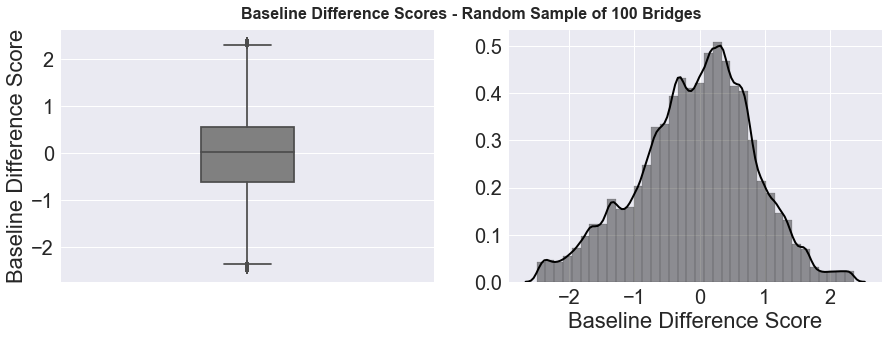

In [4]:

# Plotting Baseline Difference Scores
plt.figure(figsize=(12,4))
plt.subplots_adjust(bottom=0.025, left=0.025, top = 0.9, right=0.975)
plt.suptitle("Baseline Difference Scores - Random Sample of 100 Bridges", fontsize = 16,fontweight = 'bold')
sns.set(font_scale=2)
plt.subplot(1,2,1)
ax_1 = sns.boxplot(x = df_no_outliers["Baseline Difference Score"], color = 'grey', orient='v', width=.25)


plt.subplot(1,2,2)
sns.distplot(df_no_outliers['Baseline Difference Score'], hist=True, kde=True, 
             bins=int(180/5), color = 'Black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label="US")
plt.show()

In [6]:
df_no_outliers['Baseline Difference Score'].median()

0.014356330223869543